In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import os
print(os.getcwd())

c:\Users\tanbi\door\hall_projects\cyfuture_pred_maintenance\models\notebooks


In [2]:
train_001 = pd.read_csv("../../Data/CMAPSSData/train_FD001.txt", delim_whitespace=True, header=None)
train_002 = pd.read_csv("../../Data/CMAPSSData/train_FD002.txt", delim_whitespace=True, header=None)
train_003 = pd.read_csv("../../Data/CMAPSSData/train_FD003.txt", delim_whitespace=True, header=None)
train_004 = pd.read_csv("../../Data/CMAPSSData/train_FD004.txt", delim_whitespace=True, header=None)

C:\Users\tanbi\AppData\Local\Temp\ipykernel_18824\2750838203.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_001 = pd.read_csv("../../Data/CMAPSSData/train_FD001.txt", delim_whitespace=True, header=None)
C:\Users\tanbi\AppData\Local\Temp\ipykernel_18824\2750838203.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_002 = pd.read_csv("../../Data/CMAPSSData/train_FD002.txt", delim_whitespace=True, header=None)
C:\Users\tanbi\AppData\Local\Temp\ipykernel_18824\2750838203.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_003 = pd.read_csv("../../Data/CMAPSSData/train_FD003.txt", delim_whitespace=True, header=None)
C:\Users\tanbi\AppData\Local\Temp\ipykernel_18824\2750838203.py:

In [3]:
train_002.std()

0      74.463862
1      69.180569
2      14.747376
3       0.310016
4      14.237735
5      26.389707
6      37.289399
7     105.946341
8     119.123428
9       3.613839
10      5.431802
11    146.005306
12    145.209816
13    335.812013
14      0.127469
15      3.232372
16    137.659507
17    128.068271
18     84.837950
19      0.749335
20      0.004711
21     27.754515
22    145.327980
23      5.364067
24      9.869331
25      5.921615
dtype: float64

In [10]:
train_002.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,266.069034,2334.557253,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,137.659507,128.068271,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,129.120000,2027.610000,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,131.520000,2387.900000,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,183.200000,2388.080000,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,371.260000,2388.170000,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,523.370000,2390.480000,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100


making deep copy for eda

In [103]:
train_001_copy = train_001.copy()
train_002_copy = train_002.copy()
train_003_copy = train_003.copy()
train_004_copy = train_004.copy()

In [104]:
column_names = ["number", "time", "ops-set-1", "ops-set-2", "ops-set-3"]
for i in range(21):
    column_names.append(f"sensor-{i+1}")


In [105]:
column_names

['number',
 'time',
 'ops-set-1',
 'ops-set-2',
 'ops-set-3',
 'sensor-1',
 'sensor-2',
 'sensor-3',
 'sensor-4',
 'sensor-5',
 'sensor-6',
 'sensor-7',
 'sensor-8',
 'sensor-9',
 'sensor-10',
 'sensor-11',
 'sensor-12',
 'sensor-13',
 'sensor-14',
 'sensor-15',
 'sensor-16',
 'sensor-17',
 'sensor-18',
 'sensor-19',
 'sensor-20',
 'sensor-21']

In [13]:
train_002_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       53759 non-null  int64  
 1   1       53759 non-null  int64  
 2   2       53759 non-null  float64
 3   3       53759 non-null  float64
 4   4       53759 non-null  float64
 5   5       53759 non-null  float64
 6   6       53759 non-null  float64
 7   7       53759 non-null  float64
 8   8       53759 non-null  float64
 9   9       53759 non-null  float64
 10  10      53759 non-null  float64
 11  11      53759 non-null  float64
 12  12      53759 non-null  float64
 13  13      53759 non-null  float64
 14  14      53759 non-null  float64
 15  15      53759 non-null  float64
 16  16      53759 non-null  float64
 17  17      53759 non-null  float64
 18  18      53759 non-null  float64
 19  19      53759 non-null  float64
 20  20      53759 non-null  float64
 21  21      53759 non-null  int64  
 22

In [20]:
train_002_copy.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25],
      dtype='int64')

In [106]:
df_cpy = [train_001_copy, train_002_copy, train_003_copy, train_004_copy]
for df in df_cpy:
    df.columns = column_names

In [26]:
train_004_copy

,number,time,ops-set-1,ops-set-2,ops-set-3,sensor-1,sensor-2,sensor-3,sensor-4,sensor-5,...,sensor-12,sensor-13,sensor-14,sensor-15,sensor-16,sensor-17,sensor-18,sensor-19,sensor-20,sensor-21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774


In [107]:
print(len(train_001_copy), len(train_002_copy), len(train_003_copy), len(train_004_copy))

20631 53759 24720 61249


In [27]:
len(train_002_copy) + len(train_003_copy) + len(train_004_copy)

139728

# size of the data all combined -> 139728 rows, 26 cols

# TRAIN_002 EDA

In [28]:
train_002_copy.describe()

,number,time,ops-set-1,ops-set-2,ops-set-3,sensor-1,sensor-2,sensor-3,sensor-4,sensor-5,...,sensor-12,sensor-13,sensor-14,sensor-15,sensor-16,sensor-17,sensor-18,sensor-19,sensor-20,sensor-21
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,266.069034,2334.557253,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,137.659507,128.068271,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,129.120000,2027.610000,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,131.520000,2387.900000,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,183.200000,2388.080000,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,371.260000,2388.170000,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,523.370000,2390.480000,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100


In [54]:
# we dont want columns which have close to 0 standard deviation
describe_df = train_002_copy.describe()
# for col in describe_df.columns:
series_desc = describe_df.loc['std']
sensor_with_low_std_002 = series_desc[series_desc < 0.01].index
sensor_with_low_std_002 # Index(['sensor-16'], dtype='object')


Index(['sensor-16'], dtype='object')

In [55]:
sensor_with_low_std_002.tolist()

['sensor-16']

In [148]:
df_cpy = [
    ("FD001", train_001_copy),
    ("FD002", train_002_copy),
    ("FD003", train_003_copy),
    ("FD004", train_004_copy),
]

remove_cols = {}
STD_THRESHOLD = 0.01

for name, df in df_cpy:
    desc_df = df.describe()
    low_std_cols = desc_df.loc['std'][desc_df.loc['std'] < STD_THRESHOLD].index.tolist()
    remove_cols[name] = low_std_cols

In [149]:
remove_cols

{'FD001': ['ops-set-1',
  'ops-set-2',
  'ops-set-3',
  'sensor-1',
  'sensor-5',
  'sensor-6',
  'sensor-10',
  'sensor-16',
  'sensor-18',
  'sensor-19'],
 'FD002': ['sensor-16'],
 'FD003': ['ops-set-1',
  'ops-set-2',
  'ops-set-3',
  'sensor-1',
  'sensor-5',
  'sensor-10',
  'sensor-16',
  'sensor-18',
  'sensor-19'],
 'FD004': ['sensor-16']}

In [63]:
train_002_copy.describe()

,number,time,ops-set-1,ops-set-2,ops-set-3,sensor-1,sensor-2,sensor-3,sensor-4,sensor-5,...,sensor-12,sensor-13,sensor-14,sensor-15,sensor-16,sensor-17,sensor-18,sensor-19,sensor-20,sensor-21
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,266.069034,2334.557253,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,137.659507,128.068271,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,129.120000,2027.610000,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,131.520000,2387.900000,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,183.200000,2388.080000,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,371.260000,2388.170000,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,523.370000,2390.480000,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100


In [66]:
for col in train_002_copy.columns:
    print(f"{col}-> ", train_002_copy[col].skew())

number->  0.008221438967306082
time->  0.5008642440305779
ops-set-1->  -0.25869896059204023
ops-set-2->  -0.8349094476516868
ops-set-3->  -1.9731429394915343
sensor-1->  0.4544707738107814
sensor-2->  0.43747538543434883
sensor-3->  0.16438574451950932
sensor-4->  0.4288945866914927
sensor-5->  0.5359054818019271
sensor-6->  0.6221380295874092
sensor-7->  0.6966667339691662
sensor-8->  -1.2221100549576795
sensor-9->  0.12933396712074444
sensor-10->  0.6008457540831907
sensor-11->  -0.5455929117769108
sensor-12->  0.6978693842299574
sensor-13->  -1.9731340565365305
sensor-14->  -1.4079677085675968
sensor-15->  1.0536468277168554
sensor-16->  0.710651329322501
sensor-17->  0.17996401091720635
sensor-18->  -1.2239259950685322
sensor-19->  -1.9731429394915367
sensor-20->  0.6400402088751329
sensor-21->  0.6399246767925796


<Figure size 800x600 with 0 Axes>

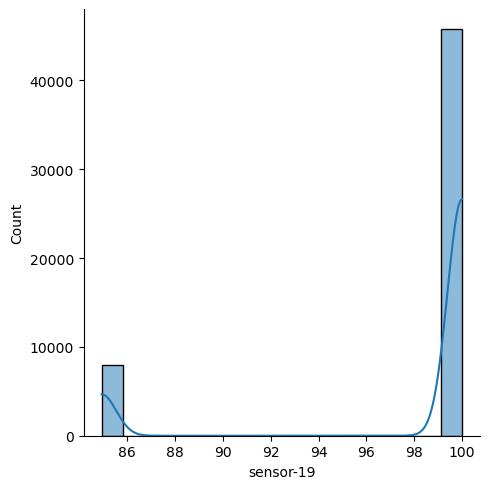

In [68]:
plt.figure(figsize=(8, 6))
sns.displot(train_002_copy['sensor-19'], kde=True)
plt.show()

# skewness could indicate that some engines degraded differently or may be those were the anomalies so skewness 

In [85]:
train_002_copy['sensor-19'].value_counts()

sensor-19
100.00    45757
84.93      8002
Name: count, dtype: int64

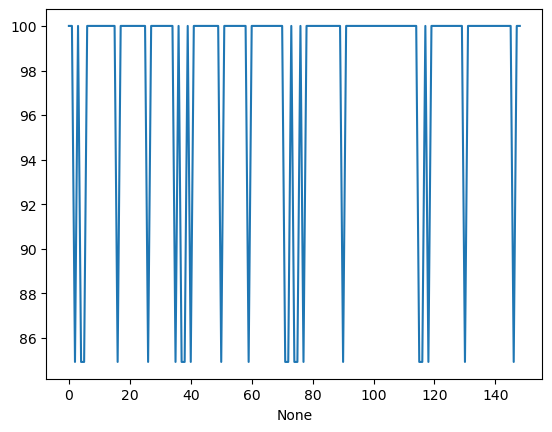

In [94]:
s = train_002_copy[train_002_copy['number'] == 1]['sensor-19']
sns.lineplot(x=s.index, y=s.values)
plt.show()

<Axes: >

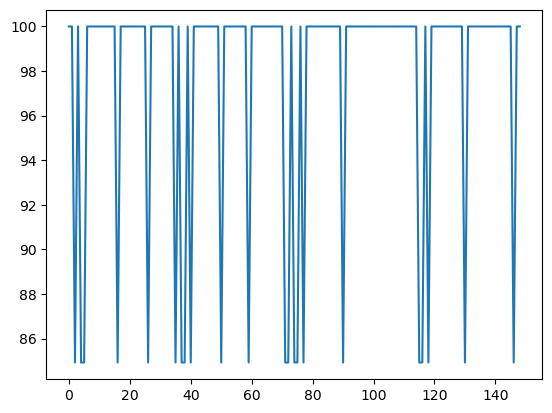

In [98]:
train_002_copy[train_002_copy['number']==1]['sensor-19'].plot(kind='line')

<Axes: xlabel='sensor-19'>

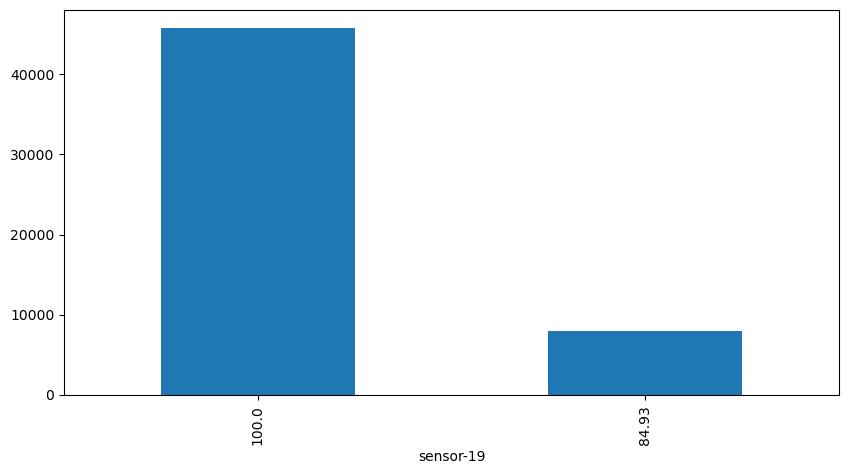

In [76]:
train_002_copy['sensor-19'].value_counts().plot(kind='bar', figsize=(10, 5))

In [123]:
correlations_002 = train_002_copy.corr(numeric_only=True)['sensor-19'].sort_values(ascending=False)
correlations_002

ops-set-3    1.000000
sensor-19    1.000000
sensor-13    0.999998
sensor-14    0.927377
sensor-18    0.902999
sensor-8     0.902746
sensor-11    0.800034
sensor-9     0.634739
sensor-3     0.620839
sensor-17    0.617185
sensor-4     0.544563
sensor-10    0.508645
sensor-2     0.480073
sensor-12    0.308334
sensor-7     0.306989
sensor-16    0.295212
sensor-20    0.276544
sensor-21    0.276479
sensor-6     0.198092
sensor-1     0.164334
sensor-5     0.113635
number       0.004777
time        -0.005057
ops-set-1   -0.028488
ops-set-2   -0.065350
sensor-15   -0.884175
Name: sensor-19, dtype: float64

In [150]:
# cols_to_drop_002 = correlations_002[(correlations_002.abs() > 0.8) & (correlations_002.index != 'sensor-19')].index.tolist()
# cols_to_drop_002

In [131]:
for col in train_002_copy.columns:
    print(f"{col}-> ", train_002_copy[col].skew())

number->  0.008221438967306082
time->  0.5008642440305779
ops-set-1->  -0.25869896059204023
ops-set-2->  -0.8349094476516868
ops-set-3->  -1.9731429394915343
sensor-1->  0.4544707738107814
sensor-2->  0.43747538543434883
sensor-3->  0.16438574451950932
sensor-4->  0.4288945866914927
sensor-5->  0.5359054818019271
sensor-6->  0.6221380295874092
sensor-7->  0.6966667339691662
sensor-8->  -1.2221100549576795
sensor-9->  0.12933396712074444
sensor-10->  0.6008457540831907
sensor-11->  -0.5455929117769108
sensor-12->  0.6978693842299574
sensor-13->  -1.9731340565365305
sensor-14->  -1.4079677085675968
sensor-15->  1.0536468277168554
sensor-16->  0.710651329322501
sensor-17->  0.17996401091720635
sensor-18->  -1.2239259950685322
sensor-19->  -1.9731429394915367
sensor-20->  0.6400402088751329
sensor-21->  0.6399246767925796


In [ ]:
# for col in cols_to_drop_002:
#     remove_cols["FD002"].append(col)


In [ ]:
# for col in cols_to_drop_002:
#     remove_cols["FD004"].append(col)

#FD004 and #FD002 are same almost

In [151]:
remove_cols

{'FD001': ['ops-set-1',
  'ops-set-2',
  'ops-set-3',
  'sensor-1',
  'sensor-5',
  'sensor-6',
  'sensor-10',
  'sensor-16',
  'sensor-18',
  'sensor-19'],
 'FD002': ['sensor-16'],
 'FD003': ['ops-set-1',
  'ops-set-2',
  'ops-set-3',
  'sensor-1',
  'sensor-5',
  'sensor-10',
  'sensor-16',
  'sensor-18',
  'sensor-19'],
 'FD004': ['sensor-16']}

In [132]:
train_002_copy

,number,time,ops-set-1,ops-set-2,ops-set-3,sensor-1,sensor-2,sensor-3,sensor-4,sensor-5,...,sensor-12,sensor-13,sensor-14,sensor-15,sensor-16,sensor-17,sensor-18,sensor-19,sensor-20,sensor-21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [134]:
train_004_copy.describe()

,number,time,ops-set-1,ops-set-2,ops-set-3,sensor-1,sensor-2,sensor-3,sensor-4,sensor-5,...,sensor-12,sensor-13,sensor-14,sensor-15,sensor-16,sensor-17,sensor-18,sensor-19,sensor-20,sensor-21
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,...,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000
mean,124.325181,134.311417,23.999823,0.571347,94.031576,472.882435,579.420056,1417.896600,1201.915359,8.031626,...,266.735665,2334.427590,8067.811812,9.285604,0.023252,347.760029,2228.613283,97.751396,20.864333,12.518995
std,71.995350,89.783389,14.780722,0.310703,14.251954,26.436832,37.342647,106.167598,119.327591,3.622872,...,138.479109,128.197859,85.670543,0.750374,0.004685,27.808283,145.472491,5.369424,9.936396,5.962697
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.480000,1242.670000,1024.420000,3.910000,...,128.310000,2027.570000,7845.780000,8.175700,0.020000,302.000000,1915.000000,84.930000,10.160000,6.084300
25%,60.000000,62.000000,10.004600,0.250700,100.000000,445.000000,549.330000,1350.550000,1119.490000,3.910000,...,134.520000,2387.910000,8062.630000,8.648000,0.020000,330.000000,2212.000000,100.000000,10.940000,6.566100
50%,126.000000,123.000000,25.001400,0.700000,100.000000,462.540000,555.740000,1367.680000,1136.920000,7.050000,...,183.450000,2388.060000,8083.810000,9.255600,0.020000,334.000000,2223.000000,100.000000,14.930000,8.960100
75%,185.000000,191.000000,41.998100,0.840000,100.000000,491.190000,607.070000,1497.420000,1302.620000,10.520000,...,371.400000,2388.170000,8128.350000,9.365800,0.030000,368.000000,2324.000000,100.000000,28.560000,17.135500
max,249.000000,543.000000,42.008000,0.842000,100.000000,518.670000,644.420000,1613.000000,1440.770000,14.620000,...,537.490000,2390.490000,8261.650000,11.066300,0.030000,399.000000,2388.000000,100.000000,39.890000,23.885200


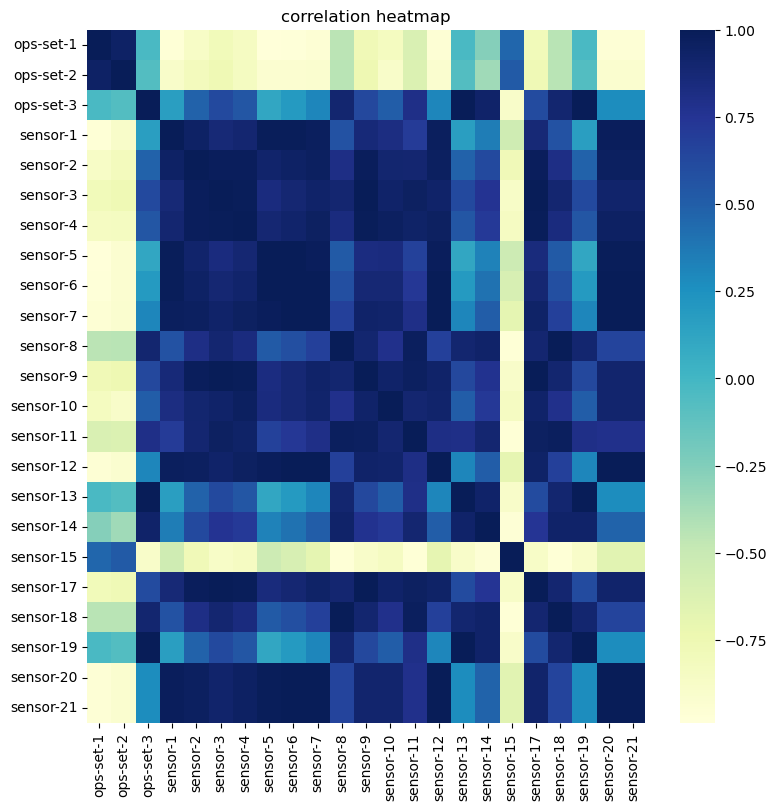

In [152]:
corr = train_002_copy.drop(columns=['number', 'time']).drop(columns=remove_cols['FD002']).corr()
plt.figure(figsize=(9, 9))
sns.heatmap(corr, annot=False, cmap='YlGnBu')
plt.title("correlation heatmap")
plt.show()

In [153]:
# feature engineering
# moving rms, moving mean, moving std
# FFT
# Time domain -> FFT -> Frequency Domain

In [154]:
import numpy as np
from scipy.fft import fft, fftfreq

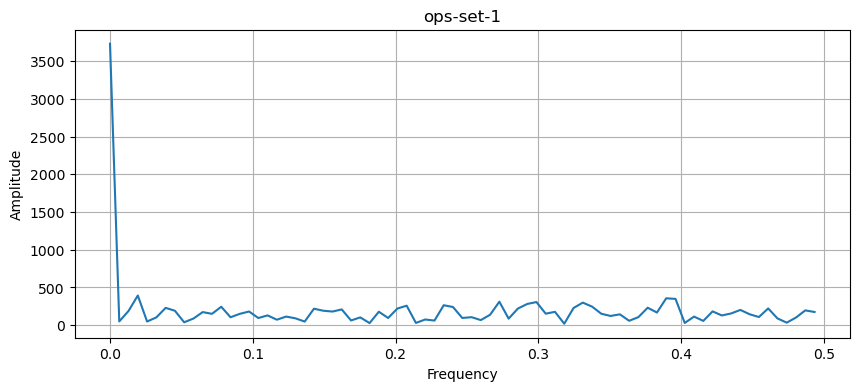

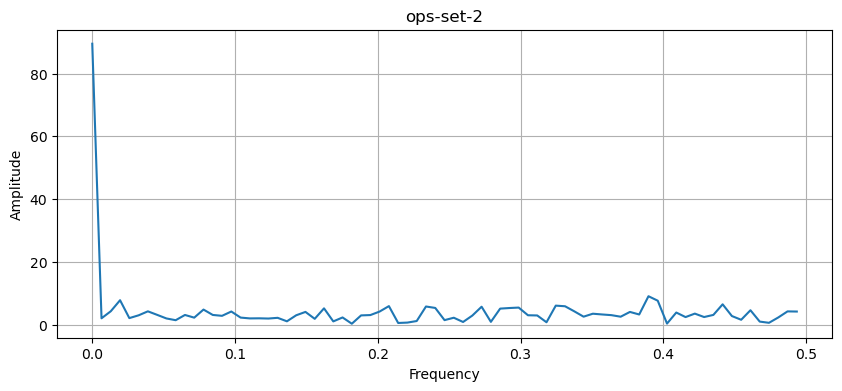

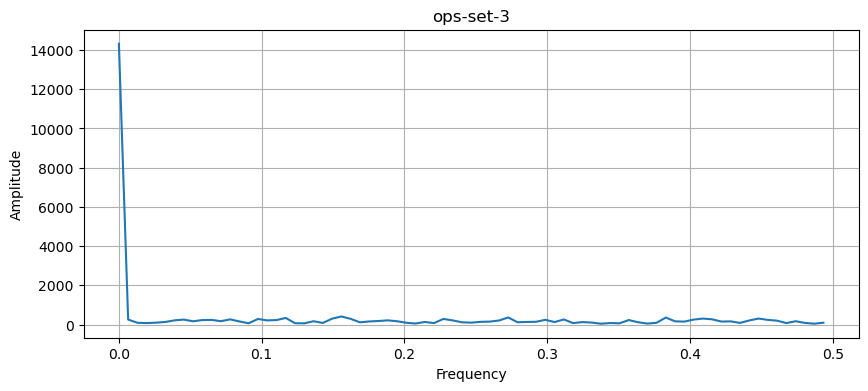

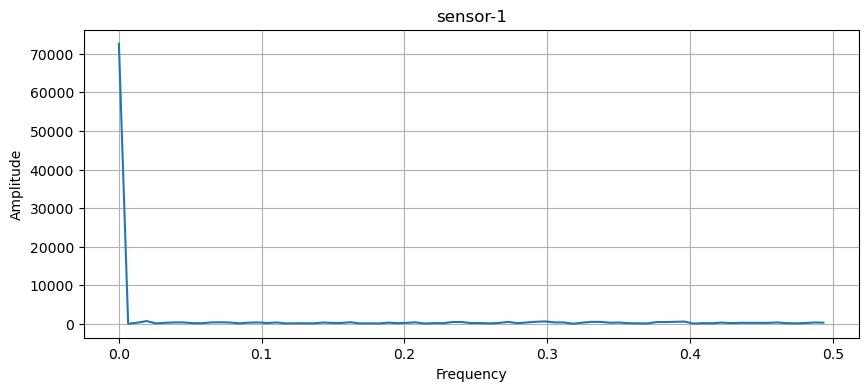

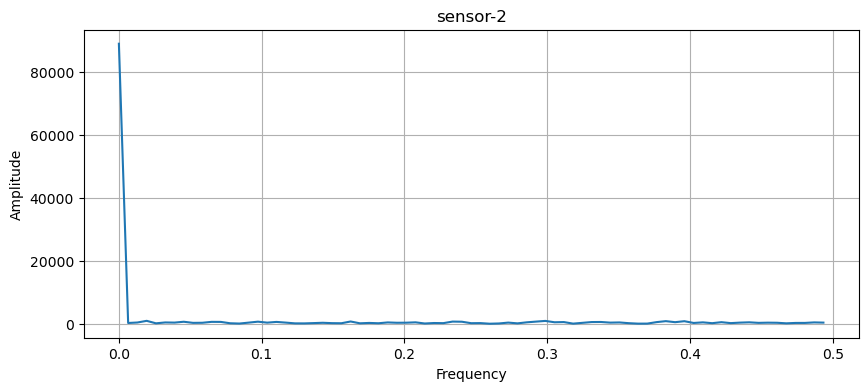

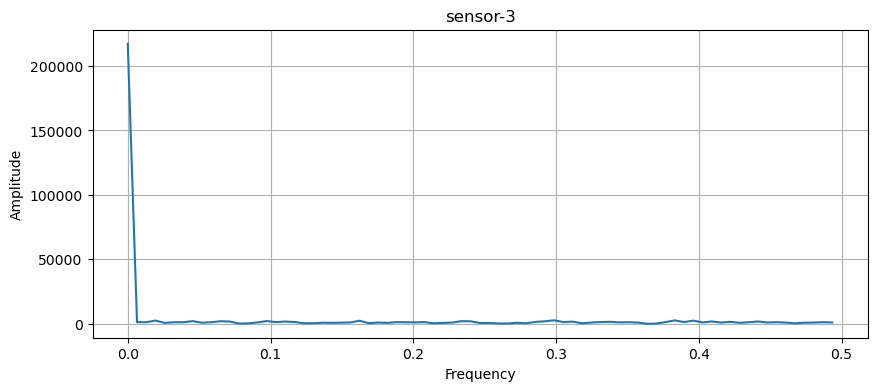

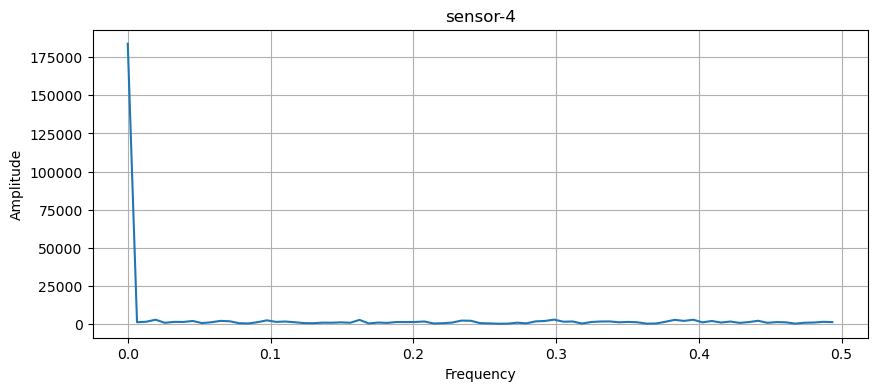

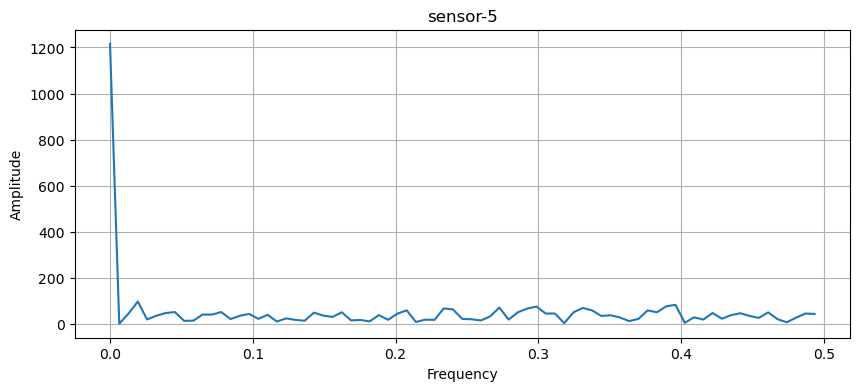

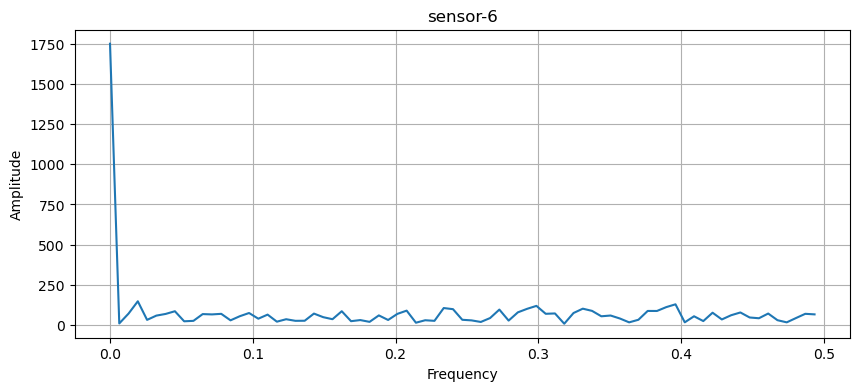

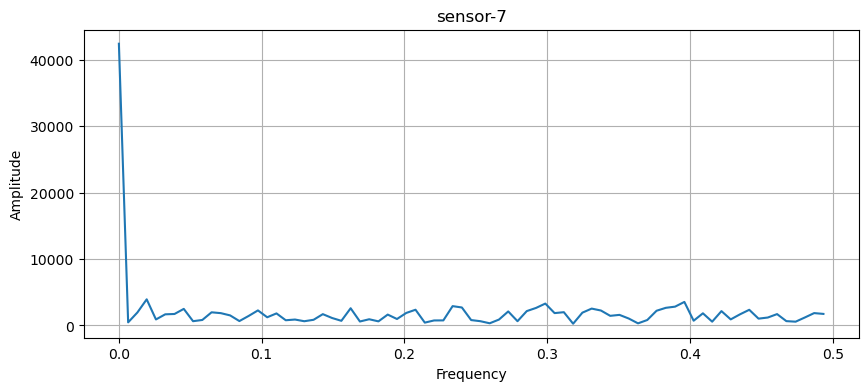

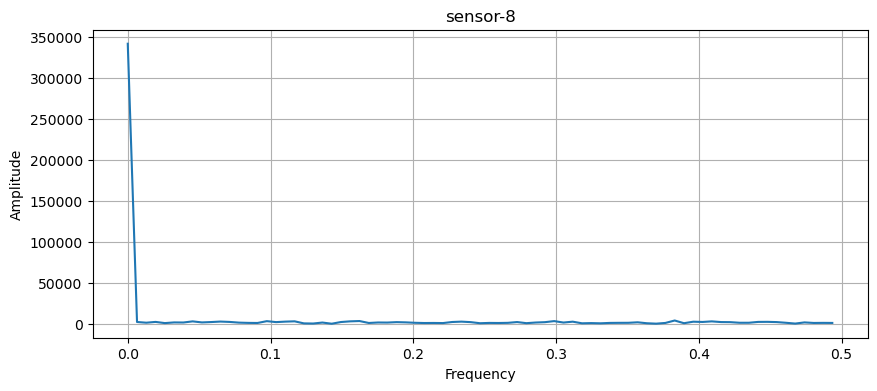

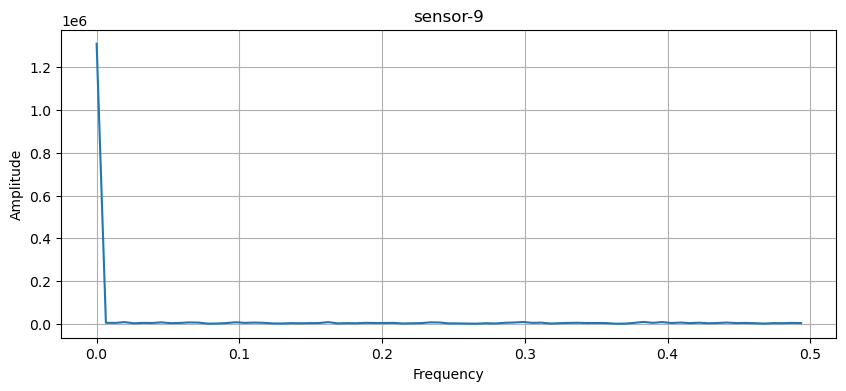

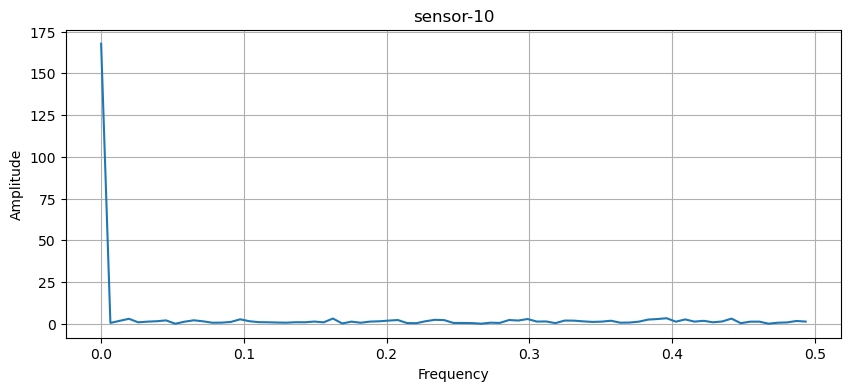

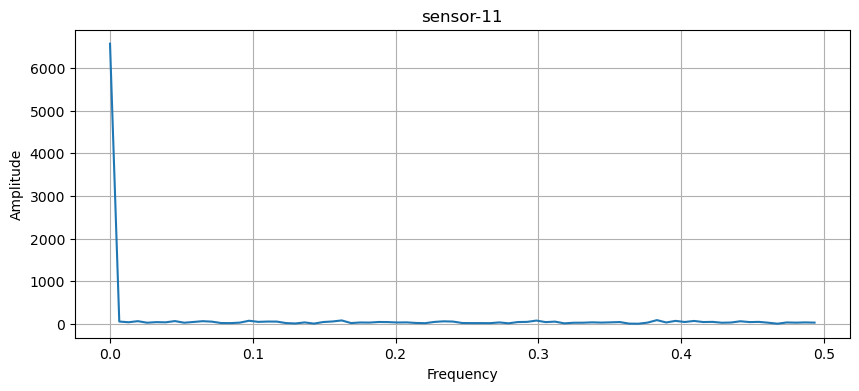

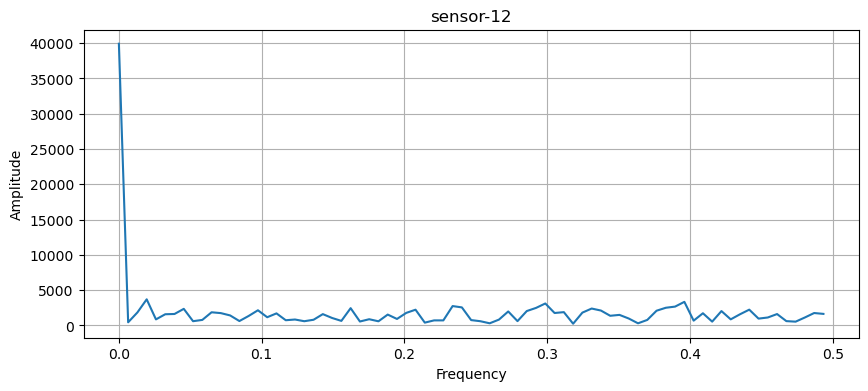

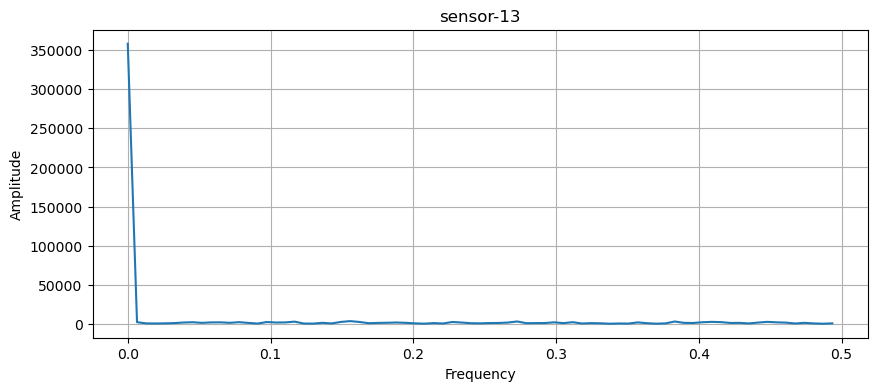

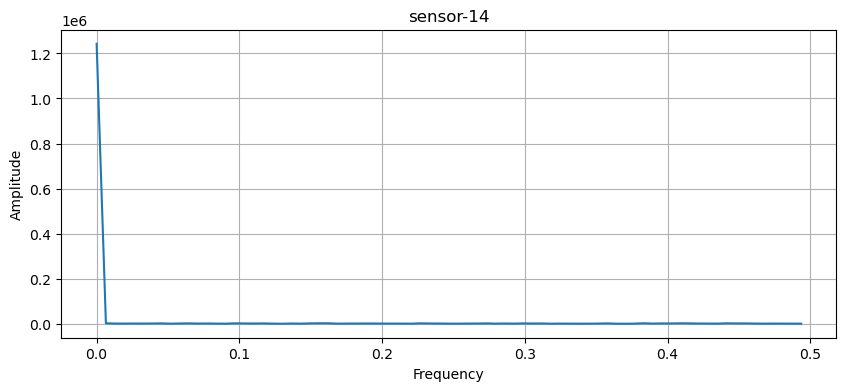

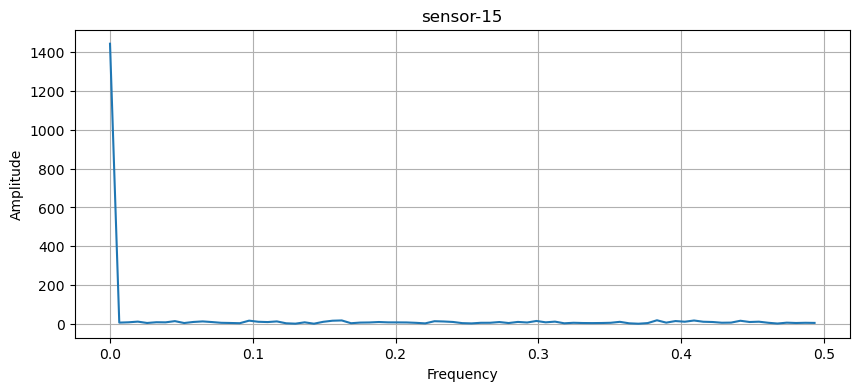

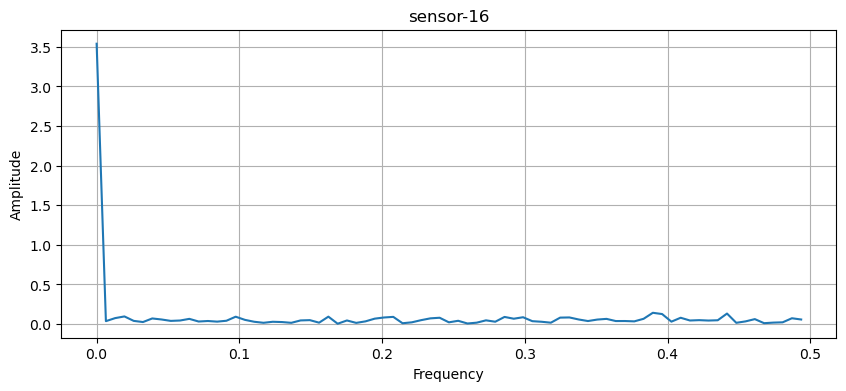

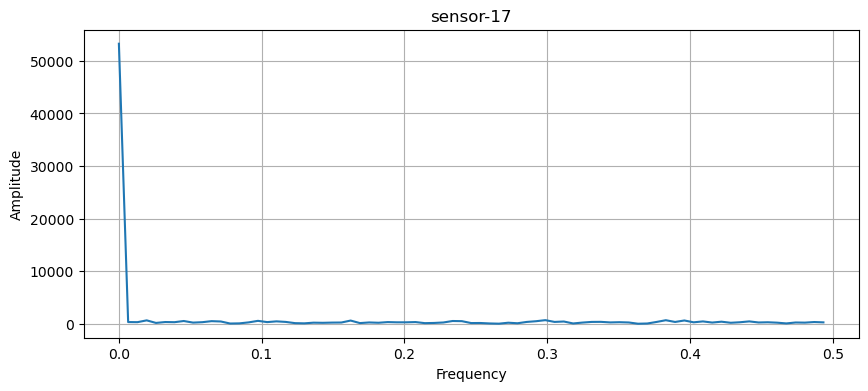

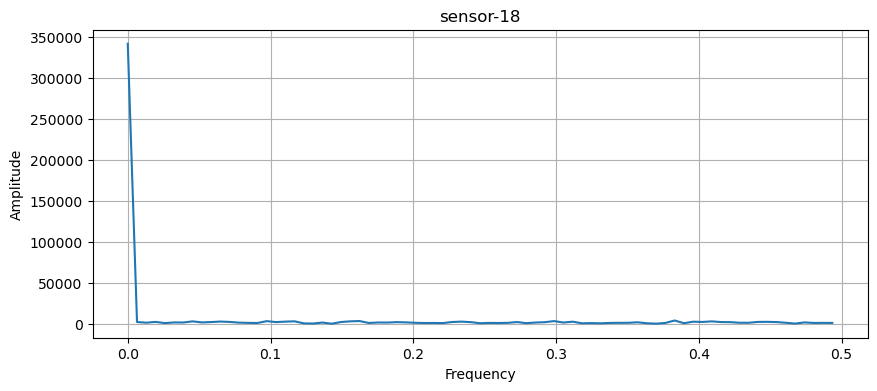

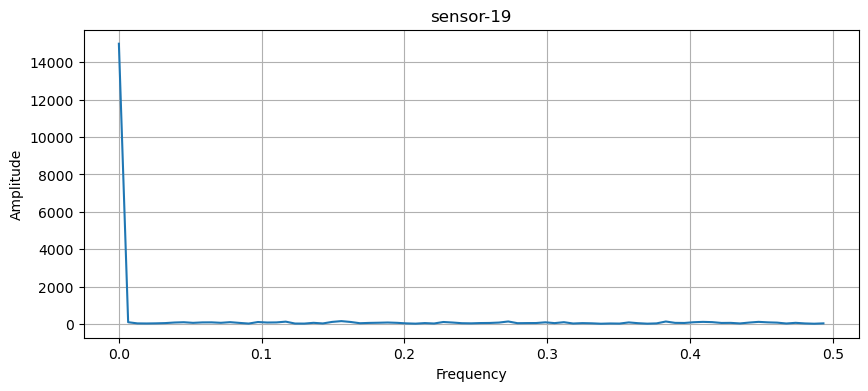

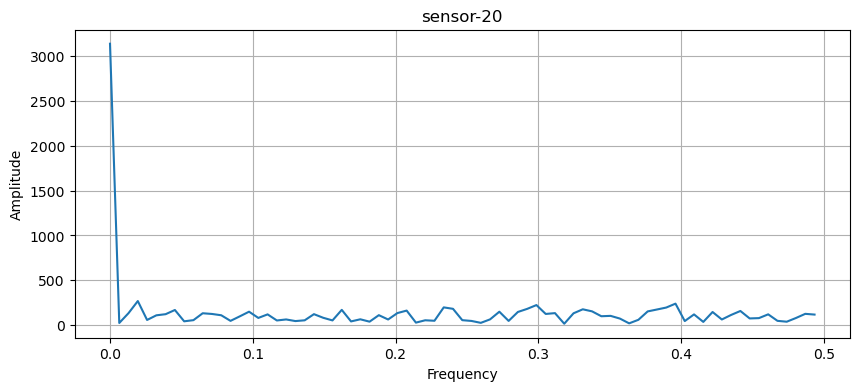

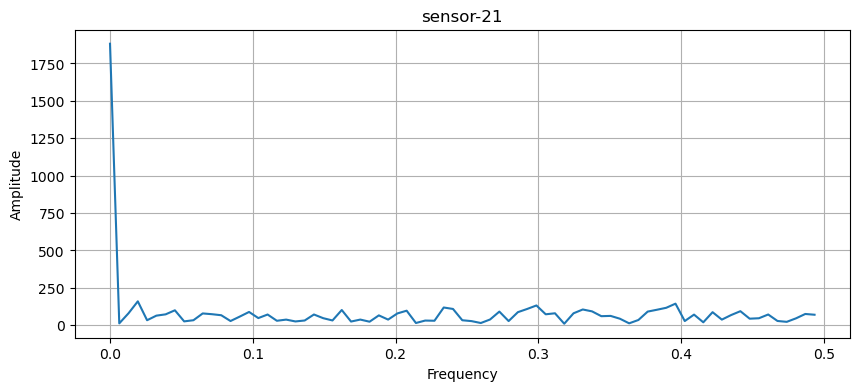

In [163]:
# example 
for col in train_002_copy.drop(columns=['number', 'time']).columns:
    signal = train_002_copy[train_002_copy['number']==5][col].values
    n = len(signal)
    timestep = 1

    # perform fft
    fft_values = fft(signal)
    frequencies = fftfreq(n, d=timestep)

    amplitude = np.abs(fft_values)

    plt.figure(figsize=(10, 4))
    plt.plot(frequencies[:n//2], amplitude[:n//2])
    plt.title(f"{col}")
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()